### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
## 선형회귀의 개선 모델들 (릿지와 라쏘)

- 선형회귀에서는 MSE(Mean Sqaured Error) 를 최소화 하는 기울기(w)와 절편(b) 를 찾는다고 했다.
- **릿지(Ridge)** 와 **라쏘(Lasso)** 는 오차값에 규제(Regulation) 항 또는 벌점(Penalty) 항을 추가해서, 좀 더 단순화된 모델 또는 일반화된 모델을 제공하는 방법이다.
- 이렇게 단순하거나 일반화된 모델에서는 훈련세트에 덜 과대적합되어, 테스트세트에 좀 더 적합한 모델을 만들 수 있습니다.
> $ MSE = {1 \over N} \sum_{i=0}^{N-1} (y_i - \hat{y}_i)^2 $ 
$ = {1 \over N} \sum_{i=0}^{N-1} (y_i - (w x_i + b))^2 $ <br>
> <br>
> In Ridge, $ Error = MSE + \alpha w^2 $ <br>
> <br>
> In Rasso, $ Error = MSE + \alpha \left\vert w \right\vert $

- 위의 공식에서 릿지는 w의 제곱항(L2 규제)를, 라쏘는 w의 절대값(L1 규제)를 추가하였습니다. 여기서 alpha 값은 규제의 강도를 의미합니다.

Populating the interactive namespace from numpy and matplotlib


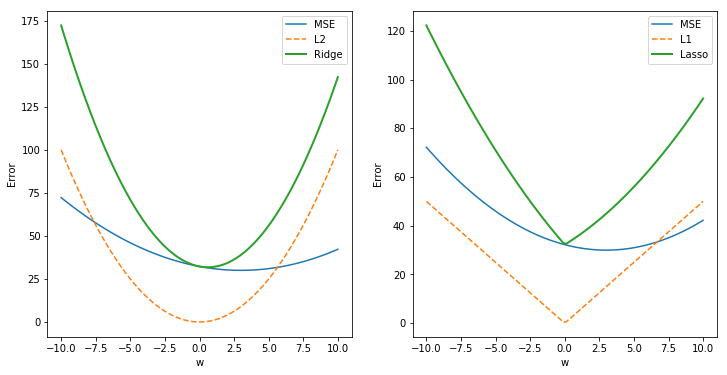

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = (0.5*(rng-3))**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

- 위의 그림을 자세히 볼 필요가 있습니다.
- 릿지와 라쏘 모두 Error 의 최소값 위치가 **w 값이 0쪽으로 치우쳐 진다** 는 것을 확인할 수 있습니다.
- 그리고 라쏘의 경우 릿지 보다 **최소값 근처에서 기울기가 크다**는 것을 볼 수 있습니다.
- 릿지와 라쏘 모두 앞에서 배운 경사하강법을 사용합니다. 그러므로 라쏘가 최소값 근방에서 급속히 w=0 으로 향하게 됩니다. 이것이 릿지와 라쏘의 가장 큰 차이입니다.
- 이런 특성 때문에, 릿지는 모든 w 값이 천천히 0으로 향하는 데 반해, 라쏘는 특정 w 값이 빨리 0으로 향하게 됩니다.
- 또한 규제의 강도를 의미하는 **alpha** 값이 커질수록 w 가 0으로 향하는 정도와 속도가 커집니다.
> SVC 에서 배운 C 값은 alpha 값의 역수이다.
> 그러므로 C 값이 커지면 alpha 값이 작아지는 의미가 되어, 훈련데이터에 과적합 되는 경향이 된다.

- 아래에서 선형회귀, 릿지, 라쏘 에서 w 값이 어떻게 변하는지 확인해 보겠습니다.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target)

In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.coef_, lr.intercept_

(array([-0.12499028, -0.05468794,  0.24022974,  0.5915014 ]),
 0.2952016936213856)

In [4]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge.coef_, ridge.intercept_

(array([-0.12375753, -0.04822912,  0.27459408,  0.50637229]),
 0.2411488508535118)

In [5]:
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso.coef_, lasso.intercept_

(array([ 0.        , -0.        ,  0.11676402,  0.        ]),
 0.5571680004117028)

- 아래에서는 각 모델의 점수를 확인해 보겠습니다.

In [6]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
display('LinearRegression', train_score, test_score)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
display('Ridge', train_score, test_score)

train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
display('Lasso', train_score, test_score)

'LinearRegression'

0.9247080142607047

0.9463233154536248

'Ridge'

0.924252828834609

0.9454258763319442

'Lasso'

0.4118618193148704

0.41985549484658363

- 라쏘의 점수가 상당히 낮습니다. 릿지와 라쏘의 규제값은 alpha 값입니다.
- alpha 값을 바꿔 가면서 점수를 확인해 보겠습니다.

In [7]:
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]
train_scores = []
test_scores = []
ws = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    ws.append(lasso.coef_)
    
    s1 = lasso.score(X_train, y_train)
    s2 = lasso.score(X_test, y_test)
    train_scores.append(s1)
    test_scores.append(s2)
    
display(train_scores, test_scores, ws)

[0.0,
 0.4118618193148704,
 0.8891090109073353,
 0.9220128421681978,
 0.9246805225272707,
 0.9247076693633242]

[-0.001890080320853471,
 0.41985549484658363,
 0.9141643299372678,
 0.9463505421788204,
 0.9464977096128748,
 0.9463351722451847]

[array([ 0., -0.,  0.,  0.]),
 array([ 0.        , -0.        ,  0.11676402,  0.        ]),
 array([ 0.        , -0.        ,  0.40726141,  0.        ]),
 array([-0.07440411, -0.0233203 ,  0.27519601,  0.45815298]),
 array([-0.1206718 , -0.05093228,  0.24455448,  0.57708136]),
 array([-0.12496291, -0.05397416,  0.24111477,  0.58946635])]

Text(0.5,0,'alpha')

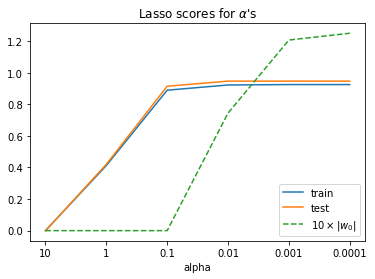

In [12]:
plt.plot(range(len(alphas)), train_scores)
plt.plot(range(len(alphas)), test_scores)
plt.plot(range(len(alphas)), 10*np.abs(np.array(ws)[:,0]), '--')
plt.xticks(range(len(alphas)),alphas)
plt.legend(['train', 'test', r'$ 10 \times \vert w_0 \vert $'],loc='lower right')
plt.title('Lasso scores for $\\alpha$\'s')
plt.xlabel('alpha')